# Understand PACE L1C angle of polarization
Meng Gao, May 30, 2024

### Definitions

#### Reference frame

A proper reference frame is needed to specify the vibration direction of the electric component of the light field. We first define the scattering plane formed by the incident light and scattered light. Relative to the scattering plane, we can define a vector axis paralell the plane ($\hat{l}$), and a vector axis perpendicular to the plane ($\hat{r}$), and $\hat{r} \times \hat{l}$ specify the direction of the light propagation. 

![reference_frame](../img/reference_frame.png "reference frame")

As shown in the plot, the light is propagated into the screen. The electric vibration direction is specified by the dashed line. The angle of linear polarization (AoLP) is related to the $\hat{l}$ axis.

Reference: 
- Hansen 1974: Figure 2 (page 531)
- Kattawar 1989: Figure 1 (page 1454)
- Liou 2002: Figure 6.13 (page 318)

#### Stokes vector

We can specify the radiance (I) at different vibration direction as
![radiance_direction](../img/radiance_direction.png "radiance_direction")

The stokes vector for linearly polarized light can be defined as:

- $I = I_{0} + I_{90} = I_{45}+I_{135}$
- $Q = I_{0} - I_{90} $
- $U = I_{45} - I_{135} $

#### How to derive the AoLP

A general electric field can be write as 

$E = E_l + i E_r$, 

we take $w = <E^2> $ therefore 

$w= < (E_l + i E_r)^2 > = <E^2_l - E^2_r> + 2 i < E_l E_r> = Q + i U $ or $w = |w| \exp (2  i \gamma)$ 

where AoLP can be derived as

$\gamma = \frac{1}{2} tan^{-1} (U/Q)$

Usually tan^{-1} output is defined within [-pi/2, pi/2], therefore AoLP is only defined within [-pi/4, pi/4], in order to define AoLP over the whole [-pi/2, pi/2] range, we adopt the common convention (Hansen and Travis, 1974) to select the value in the interval 0 ≤ AoLP ≤ π for which cos(2AoLP) has the same sign as Q. (PACE L1C document)
Reference:
- PACE L1C document: 
https://pace.oceansciences.org/docs/NASA_TM2024219027v12_Level1C.pdf
- Hansen and Travis 1974: https://pubs.giss.nasa.gov/docs/1974/1974_Hansen_ha09500o.pdf

For consistency with the Stokes vector definition, we convert everything into the range of [0, pi] or [0$^\circ$, 180$^\circ$].  We also use radian and degree interchangably. 

### Numerical test

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Check tan value, we can see within [0, pi], tan value can be the same for at least two difference angles, therefore, actan is also not unique.

Text(0, 0.5, 'Tan')

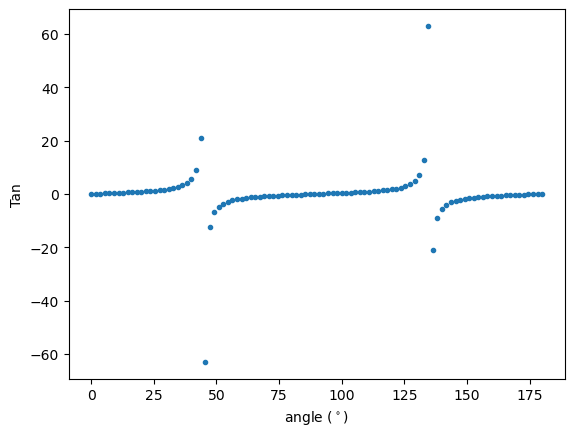

In [3]:
phiv=np.linspace(0, np.pi, 100)
#plt.plot(phiv*180/np.pi,np.tan(phiv))
plt.plot(phiv*180/np.pi,np.tan(2*phiv),'.')
plt.xlabel(r"angle ($^\circ$)")
plt.ylabel("Tan")

### formula

In [4]:
def aolp_fun2(q, u):
    """return aolp in degree, arctan2 return arctan(u/q) 
    aolp within [0, 180] """
    aolp = 1/2*np.arctan2 (u, q) 
    aolp=np.where(aolp<0, aolp+np.pi, aolp)
    aolp *= 180/np.pi
    return aolp

def get_sign(aolp):
    return np.sign(np.cos(2*aolp*np.pi/180))

#### Case studies

In [5]:
q1, u1 = 1, 0
aolp1 = aolp_fun2(q1, u1)
aolp1, get_sign(aolp1), q1

(array(0.), 1.0, 1)

In [6]:
q1, u1 = -1, 0
aolp1 = aolp_fun2(q1, u1)
aolp1, get_sign(aolp1),q1

(array(90.), -1.0, -1)

In [7]:
q1, u1 = 0, 1
aolp1 = aolp_fun2(q1, u1)
aolp1, get_sign(aolp1),q1

(array(45.), 1.0, 0)

In [8]:
q1, u1 = 0, -1
aolp1 = aolp_fun2(q1, u1)
aolp1, get_sign(aolp1), q1

(array(135.), -1.0, 0)

### matrix test and sign convention

In [9]:
xv=np.linspace(-1,1,100)
yv=np.linspace(-1,1,100)
qv, uv= np.meshgrid(xv, yv, indexing='ij')
aolpv=aolp_fun2(qv, uv)
signv=get_sign(aolpv)

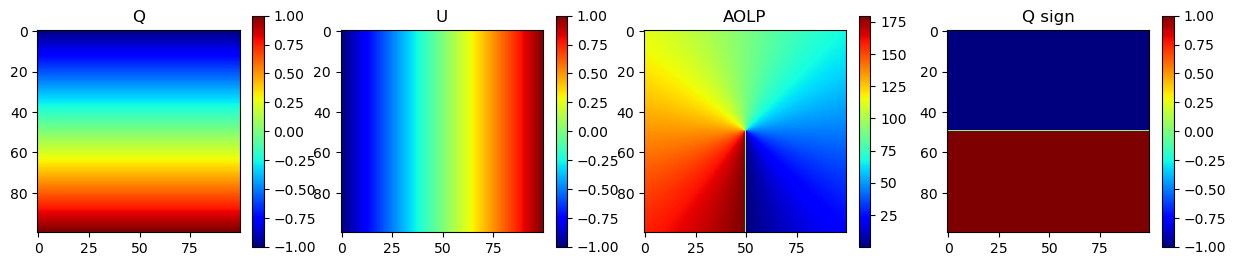

In [10]:
plt.figure(figsize=(15,3))
plt.subplot(141)
plt.title('Q')
plt.imshow(qv, cmap='jet')
plt.colorbar()
plt.subplot(142)
plt.title('U')
plt.imshow(uv, cmap='jet')
plt.colorbar()
plt.subplot(143)
plt.title('AOLP')
plt.imshow(aolpv, cmap='jet')
plt.colorbar()
plt.subplot(144)
plt.title('Q sign')
plt.imshow(signv, cmap='jet')
plt.colorbar()

We can see that the sign derived from cos(2*aolp) agree with Q, and therefore agree with the convention. 